In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [3]:
df = pd.read_csv('dataset_spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.describe(include='object')

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
# Checking if any duplicate records are present

duplicate=df[df.duplicated()] 
duplicate

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
duplicate = df[df.duplicated()] 
duplicate

,Category,Message


In [9]:
df.describe(include='object')

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [10]:
df.shape

(5157, 2)

In [11]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

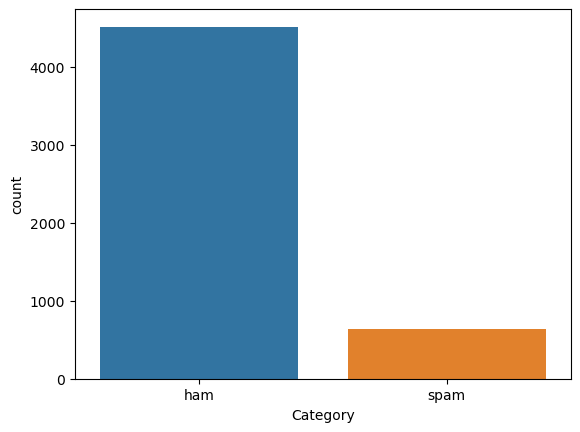

In [12]:
g =sns.countplot(x=df['Category'])
plt.show()

# Expand contractions

In [13]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))#create pattern for regex
def expand_contractions(s, contractions_dict=contractions_dict):# as input we provide each message and whole contractions_dict
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)
df['Message'] = df['Message'].apply(lambda x:expand_contractions(x))
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I do not think he goes to usf, he lives ar..."


In [14]:
df['Message'] = df['Message'].apply(lambda x:x.lower())

In [15]:
# Removing digits and words containing digits

df['Message'] = df['Message'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [16]:
# Removing punctuations

df['Message'] = df['Message'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [17]:
# removing extra 
df['Message']=df['Message'].apply(lambda x: re.sub(' +',' ',x))

In [18]:
# nltk.download()
from nltk.corpus import wordnet as wn

In [19]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    rev = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text) if w not in stopwords.words('english')]
    rev = ' '.join(rev)
    return rev

df['Message'] = df.Message.apply(lemmatize_text) #removinf stopworods like in, are, of, at, etc

In [20]:
# Creating text variable for ham

df_ham = df[df.Category == 'ham']

text_ham = " ".join(text for text in df_ham['Message'])

In [21]:
# Creating text variable for spam

df_spam = df[df.Category == 'spam']

text_spam = " ".join(text for text in df_spam['Message'])

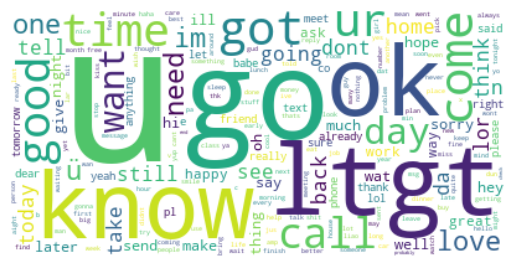

In [22]:
# Creating wordcloud for ham

ham_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_ham)
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

u, go, know, come, good, got, ok, time, ur, need, call etc. are some of the most common words in ham messages. 

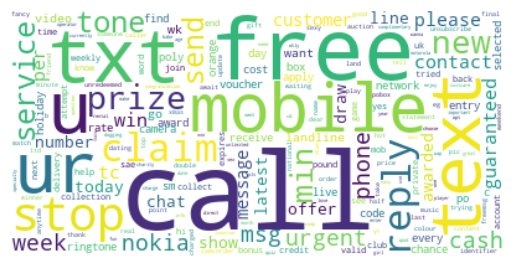

In [23]:
# Creating wordcloud for spam
spam_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_spam)
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

call, free, now, txt, reply, text, claim, prize, mobile, new, service, stop, etc. are some of the most common words in spam messages.


# TfdfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [25]:
cv = CountVectorizer()
X = cv.fit_transform(df['Message']).toarray()
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"]) 
y = df["Category"]

In [26]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

In [28]:
df_train_x, df_test_x, df_y_train, df_y_test = train_test_split(df['Message'],df['Category'] , test_size=0.33, random_state=42)

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.33, random_state=42)

In [30]:
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(df_train_x)

In [31]:
df_single_doc = pd.DataFrame(tfidf[60].T.todense(), index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df_single_doc = df_single_doc.sort_values('TF-IDF', ascending=False)
df_single_doc.head(20)

,TF-IDF
beside,0.411808
keeping,0.358297
warm,0.358297
forget,0.350789
walk,0.310524
though,0.297278
heart,0.290774
watching,0.290774
dont,0.224798
love,0.214881


In [32]:
tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english')
tfidfvectorizer.fit(df_train_x)
tfidf_train = tfidfvectorizer.transform(df_train_x)
tfidf_term_vectors  = tfidfvectorizer.transform(df_test_x)
tfidf_term_vectors.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
display(clf.predict(X_test)[:20])
display(y_test[:20])

display(clf.predict_proba(X_test[:20]))
print("Score of train data:", clf.score(X_train, y_train))
print("Score of test data:", clf.score(X_test, y_test))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

3031    0
495     0
2942    0
3911    0
3360    1
2309    1
870     1
3425    1
690     1
1219    0
3433    1
2158    0
1939    0
4304    0
4167    0
5371    0
4505    0
2846    0
3070    0
5103    0
Name: Category, dtype: int32

array([[9.84964368e-01, 1.50356323e-02],
       [7.46178576e-01, 2.53821424e-01],
       [9.98683959e-01, 1.31604070e-03],
       [9.97917218e-01, 2.08278172e-03],
       [9.78278977e-01, 2.17210228e-02],
       [4.11627981e-02, 9.58837202e-01],
       [6.82589408e-05, 9.99931741e-01],
       [4.51184483e-01, 5.48815517e-01],
       [1.52302052e-01, 8.47697948e-01],
       [9.85775698e-01, 1.42243022e-02],
       [1.91963088e-01, 8.08036912e-01],
       [9.95626376e-01, 4.37362401e-03],
       [9.82068249e-01, 1.79317505e-02],
       [9.67602663e-01, 3.23973375e-02],
       [9.57607097e-01, 4.23929032e-02],
       [9.96514636e-01, 3.48536445e-03],
       [9.95753309e-01, 4.24669068e-03],
       [9.94999391e-01, 5.00060913e-03],
       [9.91259842e-01, 8.74015834e-03],
       [9.36708364e-01, 6.32916355e-02]])

Score of train data: 0.9947901591895804
Score of test data: 0.9782608695652174


This model perform very well on both datasets

## Count how many times model classified  sample properly

In [35]:
predict_test = clf.predict(X_test)
counterLR = 0
for i in range(len(predict_test)):
    if predict_test[i] ==list(y_test)[i]:
        counterLR+=1
print(f'Number of proper claification: {counterLR} over {len(predict_test):,}, so model has missclassified number of {len(predict_test)-counterLR} documents')

Number of proper claification: 1665 over 1,702, so model has missclassified number of 37 documents


## Other metrics

In [36]:
# F1 score and accuracy

f1_score_LR = f1_score(y_test, predict_test, average='weighted')
accuracy_LR = accuracy_score(y_test, predict_test)

print("F1 Score:", f1_score_LR)
print("Accuracy Score:", accuracy_LR)

F1 Score: 0.9775954147738879
Accuracy Score: 0.9782608695652174


In [37]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1483
           1       0.98      0.85      0.91       219

    accuracy                           0.98      1702
   macro avg       0.98      0.92      0.95      1702
weighted avg       0.98      0.98      0.98      1702



We note that precision for both categories is within 2% error which is a very good result. The 85% recall score indicates that the model made an error in 15% of the documents, in fact the documents turned out to be spam. F-1 score shows the combination of precision and recall which may indicate a very good model performance. 

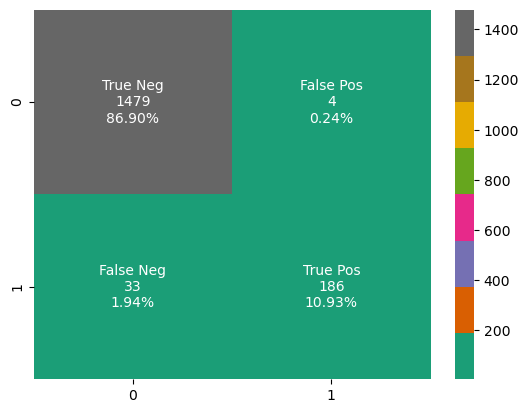

In [38]:
cm = confusion_matrix(y_test, predict_test)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Dark2')
plt.show()

# Multinominal Naive Bayes

In [39]:
nb = MultinomialNB().fit(X_train, y_train)

In [40]:
print("Score of train data:", nb.score(X_train, y_train))
print("Score of test data:", nb.score(X_test, y_test))

Score of train data: 0.9901591895803183
Score of test data: 0.963572267920094


## Count how many times model classified  sample properly

In [41]:
y_predNB = nb.predict(X_test)

counterNB = 0
for i in range(len(y_predNB)):
    if y_predNB[i] ==list(y_test)[i]:
        counterNB+=1

print(f'Number of proper claification: {counterNB} over {len(y_predNB):,}, so model has missclassified number of {len(y_predNB)-counterNB} documents')

Number of proper claification: 1640 over 1,702, so model has missclassified number of 62 documents


## Other metrics

In [42]:
# F1 score and accuracy

f1_score_NB = f1_score(y_test, y_predNB, average='weighted')
accuracy_NB = accuracy_score(y_test, y_predNB)

print("F1 Score:", f1_score_NB)
print("Accuracy Score:", accuracy_NB)

F1 Score: 0.9647318114028985
Accuracy Score: 0.963572267920094


In [43]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1483
           1       0.81      0.94      0.87       219

    accuracy                           0.96      1702
   macro avg       0.90      0.95      0.92      1702
weighted avg       0.97      0.96      0.96      1702



Compared to Logical Regression, we see here a much worse value for the precision metric, which may indicate that we managed to identify 81% of all cases belonging to this class. However, given the size of this class, i.e. 219, we can treat this as a good result. 

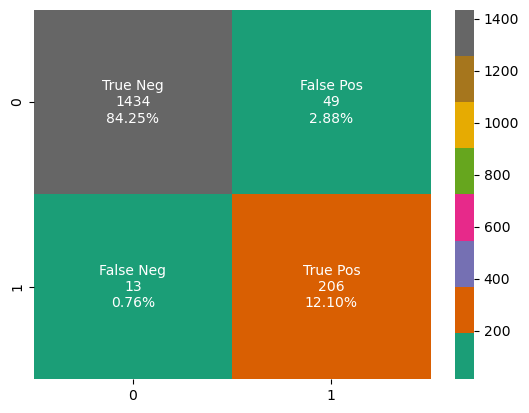

In [44]:
cm = confusion_matrix(y_test, y_predNB)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Dark2')
plt.show()

# Decission Tree

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
cross_val_score(dtc, X_train, y_train, cv=10)

array([0.94508671, 0.95375723, 0.95953757, 0.94508671, 0.95953757,
       0.96811594, 0.96521739, 0.95362319, 0.96521739, 0.95942029])

In [46]:
dtc = dtc.fit(X_train, y_train)

In [47]:
print("Score of train data:", dtc.score(X_train, y_train))
print("Score of test data:", dtc.score(X_test, y_test))

Score of train data: 1.0
Score of test data: 0.9576968272620446


## Count how many times model classified  sample properly

In [48]:
y_predDTC = dtc.predict(X_test)

counterDTC = 0
for i in range(len(y_predDTC)):
    if y_predDTC[i] ==list(y_test)[i]:
        counterDTC+=1

print(f'Number of proper claification: {counterDTC} over {len(y_predDTC):,}, so model has missclassified number of {len(y_predDTC)-counterDTC} documents')

Number of proper claification: 1630 over 1,702, so model has missclassified number of 72 documents


## Other metrics

In [49]:
# F1 score and accuracy

f1_score_DTC = f1_score(y_test, y_predDTC, average='weighted')
accuracy_DTC = accuracy_score(y_test, y_predDTC)

print("F1 Score:", f1_score_DTC)
print("Accuracy Score:", accuracy_DTC)

F1 Score: 0.9576968272620446
Accuracy Score: 0.9576968272620446


In [50]:
print(classification_report(y_test, y_predDTC))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1483
           1       0.84      0.84      0.84       219

    accuracy                           0.96      1702
   macro avg       0.91      0.91      0.91      1702
weighted avg       0.96      0.96      0.96      1702



Surprisingly this model has the worst performance so far.

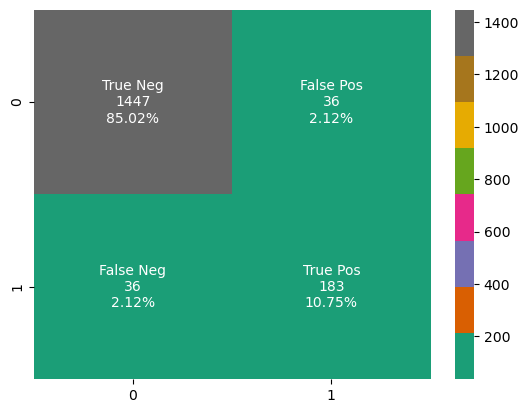

In [51]:
cm = confusion_matrix(y_test, y_predDTC)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Dark2')
plt.show()

# Linear Support Vector

In [52]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lsv = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
lsv = lsv.fit(X_train, y_train)
lsv

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [53]:
print("Score of train data:", dtc.score(X_train, y_train))
print("Score of test data:", dtc.score(X_test, y_test))

Score of train data: 1.0
Score of test data: 0.9576968272620446


## Count how many times model classified  sample properly

In [54]:
y_predlsv = lsv.predict(X_test)

counterlsv = 0
for i in range(len(y_predlsv)):
    if y_predlsv[i] ==list(y_test)[i]:
        counterlsv+=1
print(f'Number of proper claification: {counterlsv} over {len(y_predlsv):,}, so model has missclassified number of {len(y_predlsv)-counterlsv} documents')

Number of proper claification: 1640 over 1,702, so model has missclassified number of 62 documents


## Other metrics

In [55]:
# F1 score and accuracy

f1_score_lsv = f1_score(y_test, y_predlsv, average='weighted')
f1_score_lsv = accuracy_score(y_test, y_predlsv)

print("F1 Score:", f1_score_lsv)
print("Accuracy Score:", f1_score_lsv)

F1 Score: 0.963572267920094
Accuracy Score: 0.963572267920094


In [56]:
print(classification_report(y_test, y_predlsv))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1483
           1       0.81      0.93      0.87       219

    accuracy                           0.96      1702
   macro avg       0.90      0.95      0.92      1702
weighted avg       0.97      0.96      0.96      1702



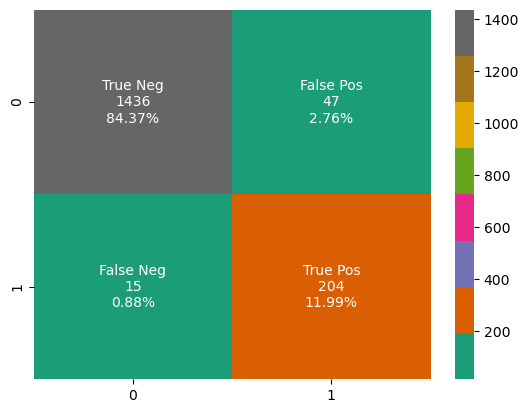

In [57]:
cm = confusion_matrix(y_test, y_predlsv)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Dark2')
plt.show()

# Result comparision

In [58]:
values_for_df = {'model_name':['Logistic Regression','NaiveBayes','Decision Tree','Linear Suppor Vector'], 'predicted_good':[counterLR,counterNB,counterDTC,counterlsv],'All_test_samples':[len(predict_test),len(y_predNB),len(y_predDTC),len(y_predDTC)]}
df_comparision = pd.DataFrame.from_dict(values_for_df)
df_comparision

,model_name,predicted_good,All_test_samples
0,Logistic Regression,1665,1702
1,NaiveBayes,1640,1702
2,Decision Tree,1630,1702
3,Linear Suppor Vector,1640,1702


In [59]:
df_comparision['number_of_missclasified_samples'] = df_comparision.All_test_samples-df_comparision.predicted_good
df_comparision = df_comparision.sort_values(by='number_of_missclasified_samples')
df_comparision

,model_name,predicted_good,All_test_samples,number_of_missclasified_samples
0,Logistic Regression,1665,1702,37
1,NaiveBayes,1640,1702,62
3,Linear Suppor Vector,1640,1702,62
2,Decision Tree,1630,1702,72
